In [15]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pathlib import Path

In [16]:
def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'fitzgerald':
            label = 0
        else:
            label = 1

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [17]:
def load_just_hemingway_and_steinbeck(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        if subfolder == 'fitzgerald':
            continue
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'hemingway':
            label = 1
        else:
            label = 0

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [18]:
up_dir = Path.cwd().parent
data_dir = up_dir.joinpath("data")
data_dir

WindowsPath('c:/Users/KSpicer/Documents/GitHub/fitzgerald_hemingway/data')

In [19]:
text_data, labels = load_just_hemingway_and_steinbeck(data_dir)
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

X = df['text_data']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_collected_stories.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: steinbeck_cannery_row.txt
Processing file: steinbeck_east_of_eden.txt
Processing file: steinbeck_grapes.txt
Processing file: steinbeck_of_mice.txt
Processing file: steinbeck_the_pearl.txt
Processing file: steinbeck_the_red_pony.txt


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=['fitzgerald', 'hemingway']))

accuracy 0.6666666666666666
              precision    recall  f1-score   support

  fitzgerald       1.00      0.33      0.50         3
   hemingway       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



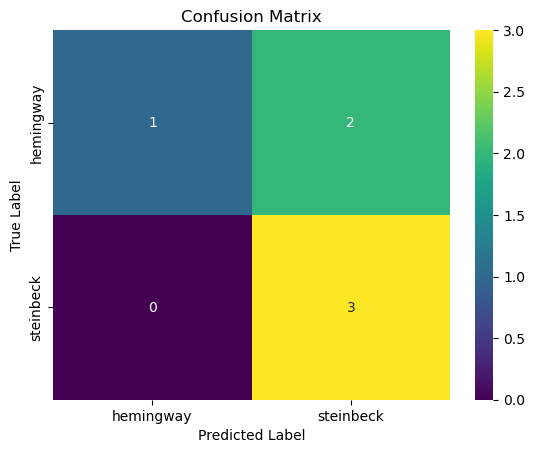

In [21]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a list of class labels
classes = ['hemingway', 'steinbeck']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Define a new text sample to classify—Hemingway's "The Snows of Kilimanjaro"
with open(r'C:\Users\KSpicer\Documents\GitHub\fitzgerald_hemingway\test_data\steinbeck_in_dubious_battle.txt') as f:
    new_text =  f.read()

vectorizer = CountVectorizer()
# Transform the new text sample into a bag-of-words representation
new_counts = vectorizer.fit_transform([new_text])

# Use the trained model to predict the label of the new text sample
new_pred = logreg.predict([new_text])

# Print the predicted label
if new_pred == 1:
    print("The model predicts that this text is by Hemingway ...")
else:
    print("The model predicts that this text is by Steinbeck ...")

y_pred = logreg.predict(X_test)

The model predicts that this text is by Hemingway ...


In [23]:
feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

In [24]:
feature_importance = list(zip(feature_names, coefficients))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

In [25]:
feature_importance

[('jody', -21.17144705893827),
 ('the', 18.420736725545993),
 ('her', -15.372773185750113),
 ('she', -14.86328018074578),
 ('an', -12.34145151605894),
 ('tom', -11.552648856662847),
 ('his', -11.300186563484516),
 ('adam', -10.940881912226475),
 ('lee', -8.617184946643812),
 ('ma', -8.542621575902059),
 ('cal', -7.60392122911354),
 ('gonna', -7.385459576146584),
 ('to', -7.304152172604338),
 ('got', -6.462414107201477),
 ('and', -6.282174066068855),
 ('samuel', -6.035058945569302),
 ('pa', -5.980906927132648),
 ('ain', -5.911556872830672),
 ('billy', -5.825227637746918),
 ('was', 5.543079329430888),
 ('all', 5.52015107496513),
 ('jus', -5.430236271715565),
 ('nick', 5.204703845293939),
 ('aron', -4.896368578480774),
 ('ll', -4.889606529532033),
 ('bull', 4.806617770908117),
 ('said', 4.5467584836253),
 ('very', 4.41097438408674),
 ('little', -4.330765323608958),
 ('kate', -4.296784492925748),
 ('brett', 4.279026850194463),
 ('were', 4.242587160180636),
 ('we', 4.048496000354719),
 ('ma

In [26]:
df = pd.DataFrame(feature_importance)
len(df)

22945

In [27]:
feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

# Create a list of tuples with the feature name and its coefficient
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance list based on the absolute value of the coefficients
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Create a dataframe from the sorted list of tuples
df = pd.DataFrame(feature_importance, columns=['feature_name', 'coefficient'])

# Display the first few rows of the sorted dataframe
df.head(50)

,feature_name,coefficient
0,jody,-21.171447
1,the,18.420737
2,her,-15.372773
3,she,-14.863280
4,an,-12.341452
5,tom,-11.552649
6,his,-11.300187
7,adam,-10.940882
8,lee,-8.617185
9,ma,-8.542622


In [28]:
import pandas as pd

feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

# Create a dataframe with the feature names and coefficients
df = pd.DataFrame({'feature_name': feature_names, 'coefficient': coefficients})

# Add a column with the absolute value of the coefficients
df['abs_coefficient'] = abs(df['coefficient'])

# Sort the dataframe by the absolute value of the coefficients in descending order
df = df.sort_values('abs_coefficient', ascending=False)

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Display the first few rows of the sorted dataframe
df.head(50)

,feature_name,coefficient,abs_coefficient
0,jody,-21.171447,21.171447
1,the,18.420737,18.420737
2,her,-15.372773,15.372773
3,she,-14.863280,14.863280
4,an,-12.341452,12.341452
5,tom,-11.552649,11.552649
6,his,-11.300187,11.300187
7,adam,-10.940882,10.940882
8,lee,-8.617185,8.617185
9,ma,-8.542622,8.542622
